In [1]:
### Reloads modules properly
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.sys.path.append('../')

# DBSCAN and FastHisto Comparison

In [15]:
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplhep as hep
hep.style.use('CMS')
from tqdm import tqdm

In [4]:
from sklearn.cluster import DBSCAN

In [24]:
storage = '/mnt/storage/lborgna/track/l1_nnt/'
tp = pd.read_pickle(storage + 'tp.pkl')
trk = pd.read_pickle(storage + 'trk.pkl')
mc = pd.read_pickle(storage + 'mc.pkl')

## Pre-processing

In [25]:
trk = trk.loc[trk['trk_pt'] !=np.inf].copy()

In [26]:
trk['is_pv'] = 0
trk.loc[trk['trk_fake']==1,'is_pv']=1

In [27]:
trk

trk_pt   trk_eta   trk_phi  trk_d0    trk_z0  trk_fake  \
entry  subentry                                                             
0      0         2.623967  1.301414 -0.289234   999.0 -0.878906         2   
       1         3.435026  0.566814 -0.159267   999.0  3.339844         2   
       2         3.774908  1.815973 -0.240375   999.0  4.921875         1   
       3         2.641448 -1.435747 -0.128747   999.0 -0.468750         2   
       4         2.320653  1.837421  0.032604   999.0  4.980469         1   
...                   ...       ...       ...     ...       ...       ...   
222975 211       2.044568 -2.407456 -0.857553   999.0  1.113281         2   
       212       2.491473 -2.141478 -0.616329   999.0  8.847656         2   
       213       2.669393  2.230316 -0.748241   999.0 -0.234375         2   
       214       3.767222 -1.994298 -0.753691   999.0 -4.746094         2   
       215       1.988538 -2.052655 -0.790385   999.0  0.996094         2   

                 is_pv  
entry  subentry         
0      0             0  
       1             0  
       2             1  
       3             0  
       4             1  
...                ...  
222975 211           0  
       212           0  
       213           0  
       214           0  
       215           0  

[40780640 rows x 7 columns]

In [28]:
from pv_utils import (
    truth_pv_z0,
    run_fast_histo,
    run_dbscan,
    primary_vertex_efficiency,
    plot_pv_efficiency_z0,
    plot_pv_resolution_z0,
)

In [29]:
z0_gen = truth_pv_z0(tp)

In [30]:
z0_mc = mc['pv_MC'].xs(0, axis = 0, level = 1, drop_level=True)

In [31]:
from pv_utils import run_pv_fast_histo, run_pv_dbscan

In [32]:
be_fh = np.arange(-15, 15+0.3, 0.3)

In [33]:
tqdm.pandas()

In [34]:
trk['fh_label'] = run_pv_fast_histo(trk, bin_edges=be_fh)

100%|██████████████████████████████████████████████████████| 222976/222976 [01:58<00:00, 1889.48it/s]


In [35]:
trk['db_label'] = run_pv_dbscan(trk)

100%|███████████████████████████████████████████████████████| 222976/222976 [16:41<00:00, 222.61it/s]


In [36]:
trk['fh_label'] = trk['fh_label'].astype(int)

In [37]:
trk

trk_pt   trk_eta   trk_phi  trk_d0    trk_z0  trk_fake  \
entry  subentry                                                             
0      0         2.623967  1.301414 -0.289234   999.0 -0.878906         2   
       1         3.435026  0.566814 -0.159267   999.0  3.339844         2   
       2         3.774908  1.815973 -0.240375   999.0  4.921875         1   
       3         2.641448 -1.435747 -0.128747   999.0 -0.468750         2   
       4         2.320653  1.837421  0.032604   999.0  4.980469         1   
...                   ...       ...       ...     ...       ...       ...   
222975 211       2.044568 -2.407456 -0.857553   999.0  1.113281         2   
       212       2.491473 -2.141478 -0.616329   999.0  8.847656         2   
       213       2.669393  2.230316 -0.748241   999.0 -0.234375         2   
       214       3.767222 -1.994298 -0.753691   999.0 -4.746094         2   
       215       1.988538 -2.052655 -0.790385   999.0  0.996094         2   

                 is_pv  fh_label  db_label  
entry  subentry                             
0      0             0         0         0  
       1             0         0         0  
       2             1         1         1  
       3             0         0         0  
       4             1         1         1  
...                ...       ...       ...  
222975 211           0         1         1  
       212           0         0         0  
       213           0         0         0  
       214           0         0         0  
       215           0         1         1  

[40780640 rows x 9 columns]

# Primary Vertex Efficiency

In [20]:
from pv_utils import pv_z0_reco

In [38]:
pv_z0_reco

<function pv_utils.pv_z0_reco(df: pandas.core.frame.DataFrame, reco_label: str = 'fh_label', z0_label: str = 'trk_z0') -> pandas.core.frame.DataFrame>

In [39]:
z0_fh = pv_z0_reco(trk, reco_label = 'fh_label', z0_label = 'trk_z0')

In [41]:
z0_db = pv_z0_reco(trk, reco_label = 'db_label', z0_label='trk_z0')

In [43]:
help(primary_vertex_efficiency)

Help on function primary_vertex_efficiency in module pv_utils:

primary_vertex_efficiency(z0_gen: <built-in function array>, z0_reco: <built-in function array>, delta: float = 0.1, include_errors: bool = True) -> float
    Returns the primary vertex reconstruction efficiency, which is dependent on the resolution (delta)



In [45]:
primary_vertex_efficiency(z0_gen=z0_mc, z0_reco=z0_fh['trk_z0'])

(66.03625502296211, 0.19700206550294297, 0.19658512592880584)

In [46]:
primary_vertex_efficiency(z0_gen=z0_mc, z0_reco=z0_db['trk_z0'])

(75.23679678530425, 0.1797101375156842, 0.1790538893312572)

# Primary Vertex Efficiency vs Z0

In [47]:
from pv_utils import plot_pv_efficiency_z0

In [48]:
help(plot_pv_efficiency_z0)

Help on function plot_pv_efficiency_z0 in module pv_utils:

plot_pv_efficiency_z0(z0_gen: <built-in function array>, z0_reco: <built-in function array>, bin_edges: <built-in function array>, delta: float = 0.1, label: str = 'none', xlim: list = [-15, 15]) -> dict



In [49]:
be = np.arange(-15, 16, 1)

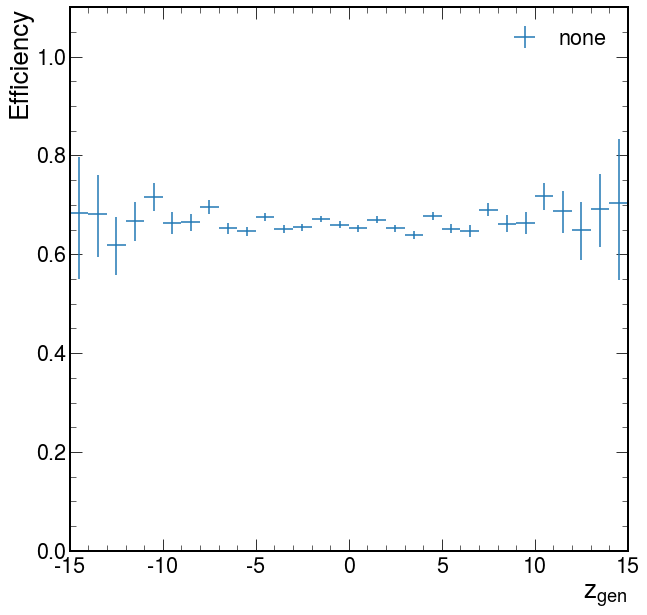

In [50]:
fh_plot = plot_pv_efficiency_z0(z0_gen= z0_mc, z0_reco=z0_fh['trk_z0'], bin_edges=be)

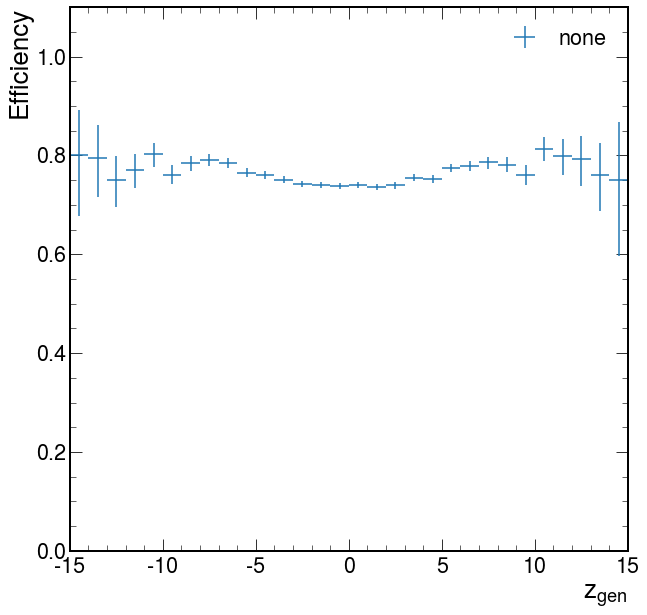

In [51]:
db_plot = plot_pv_efficiency_z0(z0_gen= z0_mc, z0_reco=z0_db['trk_z0'], bin_edges=be)

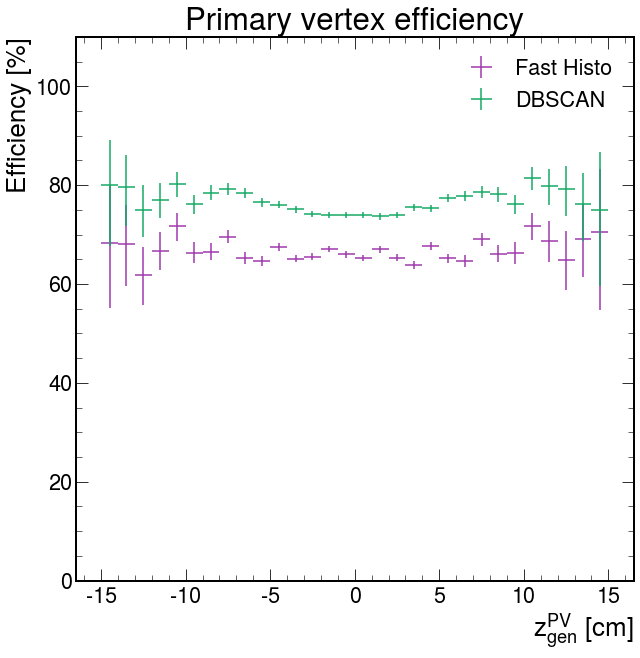

In [106]:
plt.errorbar(
    fh_plot.x,
    100 * fh_plot.eff,
    xerr=fh_plot.error_x,
    yerr=[100 * fh_plot.lower_error, 100 * fh_plot.upper_error],
    ls="none",
    label="Fast Histo",
    color="#9E37AD",
)
plt.errorbar(
    db_plot.x,
    100 * db_plot.eff,
    xerr=db_plot.error_x,
    yerr=[100 * db_plot.lower_error, 100 * db_plot.upper_error],
    ls="none",
    label="DBSCAN",
    color="#12A863",
)
plt.legend()
plt.ylim(0, 110)
plt.xlabel(r"$z^{PV}_{gen}$ [cm]")
plt.ylabel("Efficiency [%]")
plt.title("Primary vertex efficiency")
plt.savefig('pv_eff.pdf', dpi=500, bbox_inches='tight')

# Resolution vs z0 (profile plot)

In [68]:
from pv_utils import plot_pv_resolution_z0

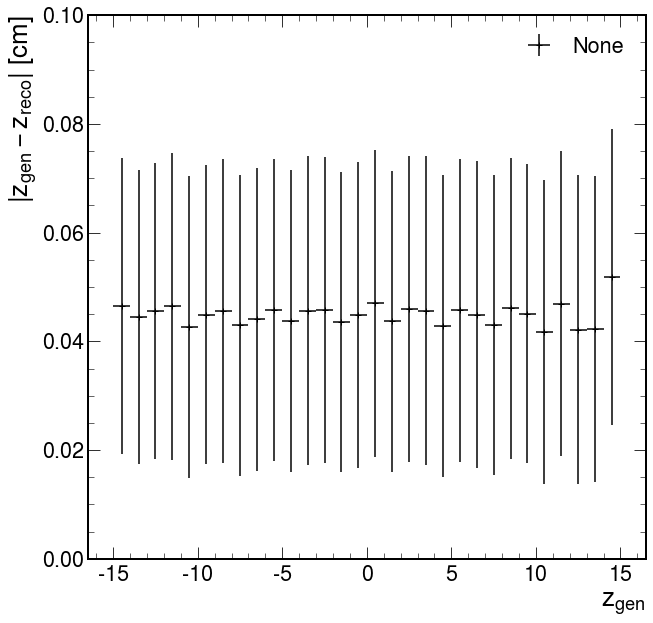

In [69]:
fh_res = plot_pv_resolution_z0(z0_gen = z0_mc, z0_reco=z0_fh['trk_z0'], bins =be)

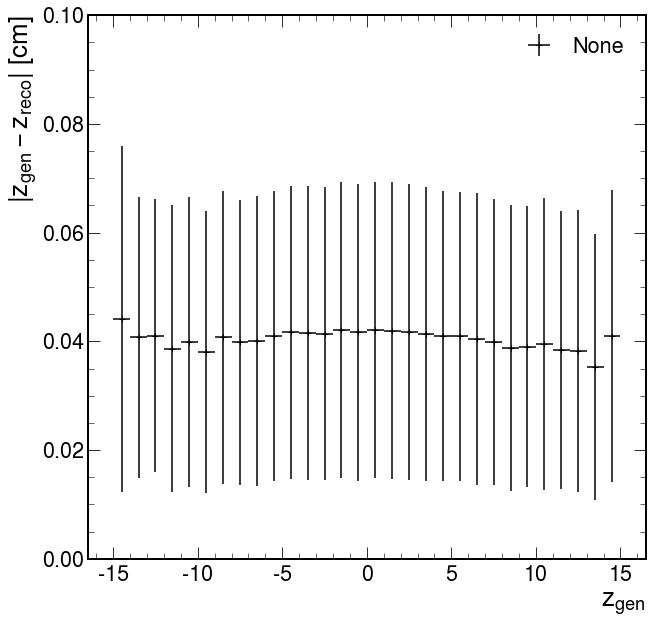

In [70]:
db_res = plot_pv_resolution_z0(z0_gen = z0_mc, z0_reco=z0_db['trk_z0'], bins =be)

In [71]:
db_res

{'x': array([-14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,  -8.5,  -7.5,  -6.5,
         -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,   0.5,   1.5,   2.5,
          3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,  10.5,  11.5,
         12.5,  13.5,  14.5]),
 'mean_resolution': array([0.04416762, 0.04073952, 0.0410714 , 0.03868376, 0.03987278,
        0.03801695, 0.04075074, 0.03981366, 0.04005818, 0.04092438,
        0.04166361, 0.04151535, 0.04141663, 0.0421082 , 0.04166503,
        0.0420943 , 0.04198848, 0.04173819, 0.04134618, 0.0410035 ,
        0.04094806, 0.04037646, 0.03990963, 0.03874188, 0.03900656,
        0.03950714, 0.03838841, 0.03824005, 0.035195  , 0.04106282]),
 'xerr': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5]),
 'yerr': array([0.03184967, 0.02589424, 0.02502993, 0.02641281, 0.02669305,
        0.0259008 , 0.02690697, 0.02621938, 0.02664068, 0.0266

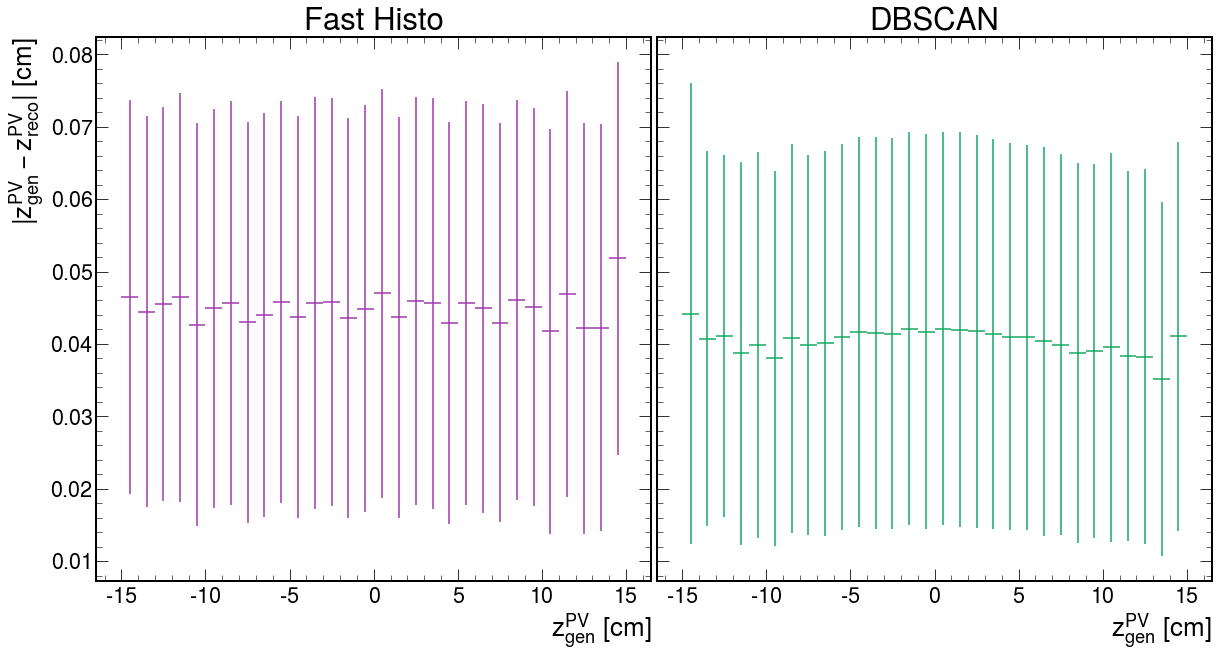

In [107]:
fig,ax = plt.subplots(1,2, figsize=(20,10), sharex=True, sharey=True)
ax[0].errorbar(
    fh_res['x'],
    fh_res['mean_resolution'],
    xerr=fh_res['xerr'],
    yerr=fh_res['yerr'],
    ls="none",
    label="Fast Histo",
    color="#9E37AD",
)
ax[1].errorbar(
    db_res['x'],
    db_res['mean_resolution'],
    xerr=db_res['xerr'],
    yerr=db_res['yerr'],
    ls="none",
    label="DBSCAN",
    color="#12A863",
)
plt.subplots_adjust(wspace=0.01)
ax[0].set_xlabel(r"$z^{PV}_{gen}$ [cm]")
ax[1].set_xlabel(r"$z^{PV}_{gen}$ [cm]")
ax[0].set_ylabel(r"$|z^{PV}_{gen} - z^{PV}_{reco}|$ [cm]")
ax[0].set_title('Fast Histo')
ax[1].set_title('DBSCAN')
plt.savefig('resolution_z0.pdf',dpi=500, bbox_inches='tight')

# Resolution histogram

In [112]:
print("")

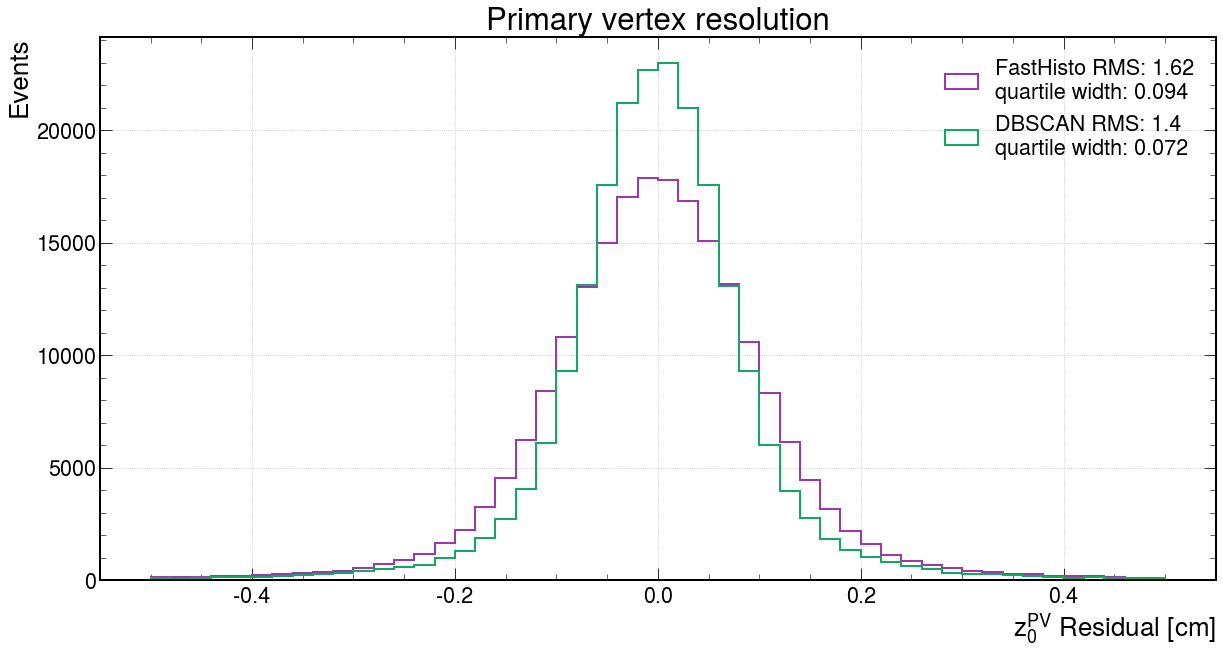

Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3810, in atexit_operations
    self.reset(new_session=False)
  File "/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 1421, in reset
    self.history_manager.reset(new_session)
  File "/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/IPython/core/history.py", line 592, in reset
    self.dir_hist[:] = [os.getcwd()]
FileNotFoundError: [Errno 2] No such file or directory


In [113]:
q_fh = np.percentile((z0_mc-z0_fh['trk_z0']), [32, 50, 68])
q_db = np.percentile((z0_mc-z0_db['trk_z0']), [32, 50, 68])



fig, ax = plt.subplots(1, 1, figsize=(20, 10))

RMS_fh = np.sqrt(np.mean((z0_mc-z0_fh['trk_z0'])**2))
RMS_db = np.sqrt(np.mean((z0_mc-z0_db['trk_z0'])**2))


quartile_fh = round(q_fh[2] - q_fh[0],3)
quartile_db = round(q_db[2] - q_db[0],3)

RMS_fh = round(RMS_fh,2)
RMS_db = round(RMS_db,2)
label_fh = "RMS: " + str(RMS_fh)
label_db = "RMS: " + str(RMS_db)

ax.hist(
    z0_mc - z0_fh["trk_z0"],
    bins=50,
    range=(-0.5, 0.5),
    histtype="step",
    label='FastHisto ' + label_fh + '\nquartile width: ' + str(quartile_fh),
    color="#9E37AD",lw=2
)


ax.hist(
    z0_mc - z0_db["trk_z0"],
    bins=50,
    range=(-0.5, 0.5),
    histtype="step",
    label='DBSCAN ' + label_db + '\nquartile width: ' + str(quartile_db),
    color="#12A863",lw=2
)


ax.legend()

ax.grid(True)


ax.set_xlabel('$z^{PV}_0$ Residual [cm]',ha="right",x=1)
ax.set_ylabel('Events',ha="right",y=1)
ax.set_title('Primary vertex resolution')
plt.savefig('histogram_resolution.pdf', dpi=500, bbox_inches='tight')


# Classification Statistics ( Maybe confusion matrix)

In [93]:
from pv_utils import trk_vertex_association

In [94]:
class_fh = trk_vertex_association(trk, true_label='is_pv',pred_label='fh_label')
class_fh

{'tn': 33778596,
 'fp': 806129,
 'fn': 3113303,
 'tp': 3082612,
 'TPR': 0.49752328752089076,
 'FPR': 0.023308816247635335,
 'AUC': 0.7371072356366277}

In [96]:
class_db = trk_vertex_association(trk, true_label='is_pv',pred_label = 'db_label')
class_db

{'tn': 32458244,
 'fp': 2126481,
 'fn': 1307615,
 'tp': 4888300,
 'TPR': 0.7889553036153659,
 'FPR': 0.061486132967661304,
 'AUC': 0.8637345853238523}

In [97]:
from pv_utils import make_confusion_matrix

In [98]:
help(make_confusion_matrix)

Help on function make_confusion_matrix in module pv_utils:

make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues', title=None)
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
cf_fh = confusion_matrix(trk['is_pv'], trk['fh_label'])

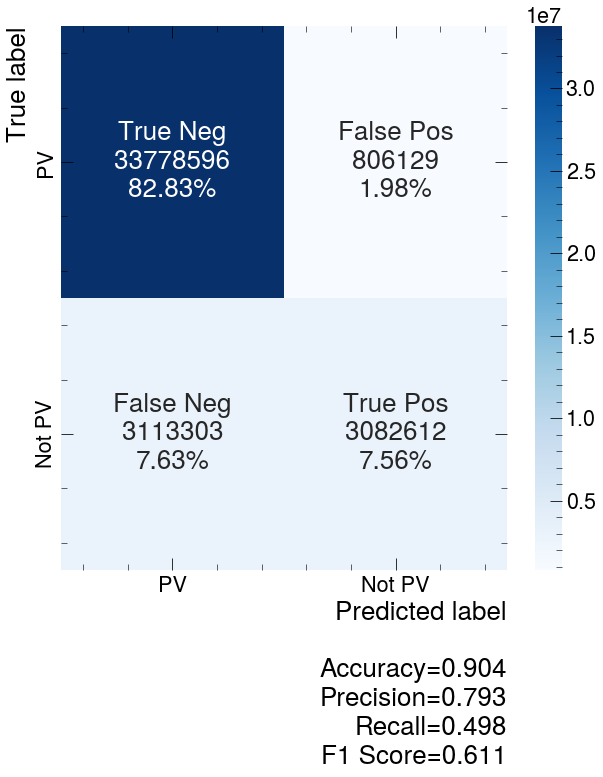

In [110]:
labels = ['True Neg','False Pos', 'False Neg','True Pos']
categories = ['PV', 'Not PV']
make_confusion_matrix(cf_fh, group_names=labels, categories=categories)
plt.savefig('cm_fh.pdf', dpi=500, bbox_inches='tight')

In [104]:
cf_db = confusion_matrix(trk['is_pv'], trk['db_label'])

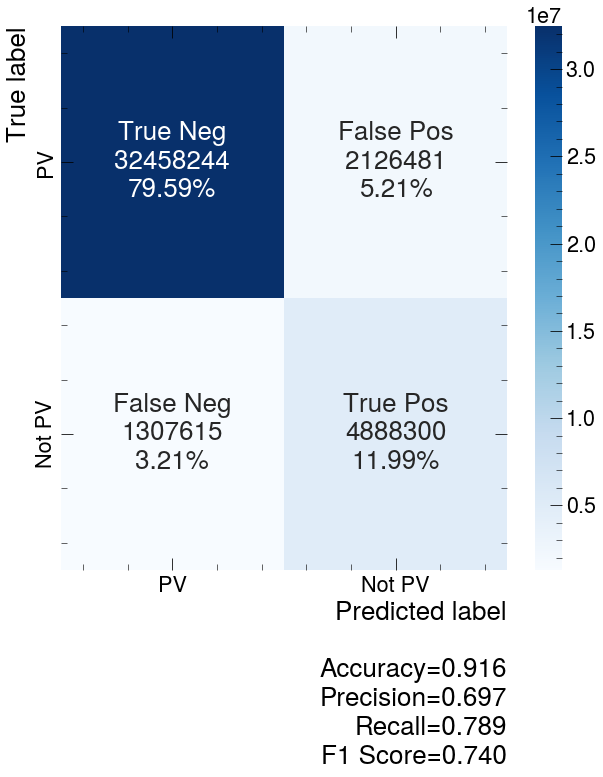

In [111]:
make_confusion_matrix(cf_db, group_names=labels, categories=categories)
plt.savefig('cm_db.pdf', dpi=500, bbox_inches='tight')